<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Grouping Data with Pandas

_Authors: Kiefer Katovich (SF), Dave Yerrington (SF), Mario Carrillo (SF)_

---

You are going to investigate UFO sightings around the US.  This lab will give you practice performing `groupby` operations to split data along multiple dimensions and investigate patterns between subsets of the data using basic aggregation.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Load and print the header for the UFO data.

In [8]:
ufo_csv = './datasets/ufo.csv'

In [11]:
# A:
ufo = pd.read_csv(ufo_csv)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [13]:
# A:
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

#### 3. Which city has the most observations?

In [25]:
# A:
ufocity = ufo.groupby("City").apply(len).sort_values(ascending=False).head(10)
ufocity

City
Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Los Angeles      416
San Diego        401
Houston          340
Chicago          337
Miami            279
dtype: int64

#### 4. What is the observation count per shape?

In [31]:
# A:
ufoshape = ufo.groupby("Shape Reported").apply(len).sort_values(ascending=False)
ufoshape

Shape Reported
LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
ROUND            2
CRESCENT         2
HEXAGON          1
DOME             1
PYRAMID          1
FLARE            1
dtype: int64

In [32]:
ufo['Shape Reported'].value_counts()

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
ROUND            2
CRESCENT         2
DOME             1
HEXAGON          1
PYRAMID          1
FLARE            1
Name: Shape Reported, dtype: int64

#### 5. Create a subset of the data that includes one of the top 5 cities and one of the top 5 shapes.

In [38]:
# A:
#ufo['Shape Reported'].value_counts()
#newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]
ufo_city_shape = ufo[ufo.City == "Seattle"]
ufo_city_shape

cities = ['Seattle','New York City','Phoenix','Las Vegas','Portland']
shapes = ['LIGHT','TRIANGLE','CIRCLE','FIREBALL','OTHER']
subset = ufo[ufo['City'].isin(cities) & ufo['Shape Reported'].isin(shapes)]

In [43]:
print (ufo.shape)
print (subset.shape)

(80543, 5)
(1322, 5)


#### 6. With the subset, find the percent of each shape seen by city.

In [53]:
# A
subset.groupby(["City","Shape Reported"])["State"].apply(len)/subset.groupby(["City"])["State"].apply(len)

City           Shape Reported
Las Vegas      CIRCLE            0.194444
               FIREBALL          0.101852
               LIGHT             0.393519
               OTHER             0.166667
               TRIANGLE          0.143519
New York City  CIRCLE            0.201439
               FIREBALL          0.125899
               LIGHT             0.377698
               OTHER             0.151079
               TRIANGLE          0.143885
Phoenix        CIRCLE            0.127820
               FIREBALL          0.131579
               LIGHT             0.398496
               OTHER             0.172932
               TRIANGLE          0.169173
Portland       CIRCLE            0.199134
               FIREBALL          0.125541
               LIGHT             0.432900
               OTHER             0.125541
               TRIANGLE          0.116883
Seattle        CIRCLE            0.151057
               FIREBALL          0.166163
               LIGHT             0.389728
    

**7. Make a grouped bar chart with your subset data showing counts of shapes seen by city.**

<AxesSubplot:xlabel='City'>

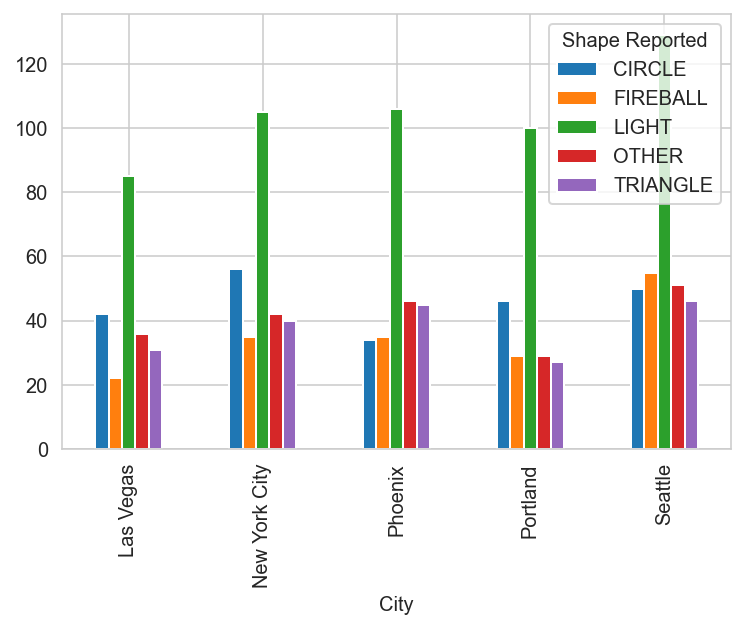

In [55]:
# A:
subset.groupby(["City","Shape Reported"])["State"].apply(len).unstack().plot(kind='bar')